# NPV - Net Present Value 
 - This analysis attempts to discover whether a project is financially feasible by considereing the initial cost and the discounted present value of all associated cash flows. If the NPV vlaue is above 0, it indicates that the project could be financially reasonable at the specified discount rate.

### Import Required Packages

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy_financial as npf

from NPV_Discount_Rate_Calculator import wacc_calc

### Project Analysis

In [4]:
# Specify the estimated cash flows as a list, the cash flows can be estimated using various approaches
cash_flows = [-100,20,20,20,20,20,20,20,20,20]

### IRR

In [5]:
# Calculate the IRR - Internal Rate of Return or the rate at which NPV will break even given the CFs
irr = npf.irr(cash_flows)
irr

0.13704474216582607

### Cost of Capital - Discount Rate

In [6]:
# Use the custom WACC function to calculate the weighted average cost of capital

# Specify the functions inputs
current_debt_to_value = 0.40    
unlevered_beta = 1.12
tax_rate = 0.40
rf_rate = 0.09
market_premium = 0.045

# Use the inputs to generate the functions results
wacc = wacc_calc(current_debt_to_value,unlevered_beta, tax_rate, rf_rate, market_premium)

round(wacc,3)

0.116

### NPV - Net Present Value Calculation

In [7]:
# Specify the discount rate
discount_rate = wacc

# Calculate the investment period by finding the length of the cf list
investment_period = len(cash_flows)

# Discover the initial cost by isolating the first cash outflow
initial_investment = cash_flows[0]

In [8]:
# Calculate the NPV of the project by taking the sum of the initial expense and
# all of the cash flows discounted to their present value.
pv_cf = []
period = []

pv_cf.append(initial_investment)
period.append(0)

for i in range(1,investment_period):
    pv_cf.append(cash_flows[i] / ((1+discount_rate)**i))
    period.append(i)

npv = sum(pv_cf)

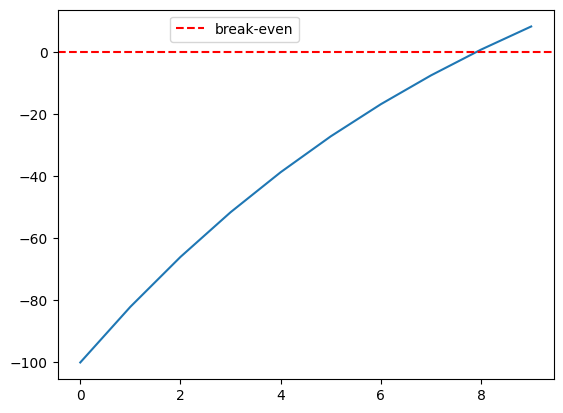

In [9]:
# Visualize the Project over the years of investment
pv_list = []

for i, cf in enumerate(cash_flows):
    pv_list.append(sum(pv_cf[:i+1]))
    
plt.plot(period, pv_list)
plt.axhline(y = 0, color = 'r', linestyle = '--', label = "break-even")
plt.legend(bbox_to_anchor = (0.5, 1))